2. “assignment_8_2.ipynb” to describe the latest bilateral trade data for the
G7 (this aggregate can be computed using bilateral imports and exports
data available on the IMF Direction of Trade Statistics
[https://data.imf.org/?sk=9d6028d4-f14a-464c-a2f2-59b2cd424b85]) with
the three network graphical representations in the module on network
visualization.

In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

## Load the data

Use https://data.imf.org/?sk=9D6028D4-F14A-464C-A2F2-59B2CD424B85&sId=1390030341854 to download the data and load in the data. Here 2021M1 and export information is used

In [2]:
import pandas as pd

trade_latest = pd.read_excel("export_2021m1.xlsx", skiprows=1, index_col=0, nrows=7)   #index_col: leftmost column
trade_latest

,Canada,France,Germany,Italy,Japan,United Kingdom,United States
Canada,NaN,182.352251,415.434050,181.372819,800.140783,1524.279961,26703.649930
France,295.809053,NaN,6499.882449,3609.601611,671.496776,2212.457674,3008.172497
Germany,765.305670,9564.520318,NaN,6580.061189,1804.535371,5353.747032,10348.494982
Italy,331.691543,4508.622422,5843.193709,NaN,687.903268,1543.974658,3610.256816
Japan,664.301920,525.365888,1515.356257,365.072103,NaN,875.286681,10645.095673
United Kingdom,370.041409,1568.474303,2563.928364,749.513129,588.939467,NaN,4036.455558
United States,21217.187629,1996.406425,4516.721760,1815.032006,6017.644718,4670.679914,NaN


## Create the network

We first convert the matrix data into pair data

In [3]:
trade_latest = pd.melt(trade_latest.reset_index(), id_vars='index')
trade_latest.columns = ['export_country', 'import_country', 'value']

In [4]:
trade_latest.dropna(inplace=True) #export between same country, NAN values, were dropped
trade_latest.head()

,export_country,import_country,value
1,France,Canada,295.809053
2,Germany,Canada,765.305670
3,Italy,Canada,331.691543
4,Japan,Canada,664.301920
5,United Kingdom,Canada,370.041409


Now we can use the pairs to create the graph, with the first two columns representing the nodes and the last column representing the weight

In [5]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph()

for index, row in trade_latest.iterrows():
    G.add_edge(row['export_country'], row['import_country'], weight=row['value']) #link is 'value' row

# remove isolated vertices (if any)    
remove = [node for node,degree in G.degree() if degree ==0] 
G.remove_nodes_from(remove)

#Setting size and colours
options = {
     'node_color': 'lightblue',
     'edge_color': 'lightblue',
     'node_size': 1,
     'width': 1,
     'alpha': 1.0}

## Draw the graph

### Spring layout

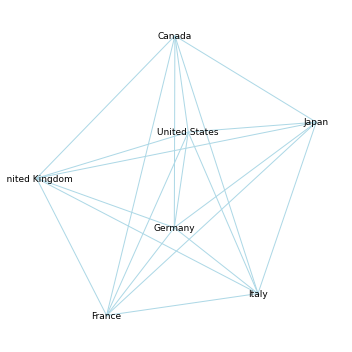

In [6]:
plt.subplots(figsize=(5,5))
pos=nx.spring_layout(G)
nx.draw(G,pos=pos,font_size=9,**options) # ** : take each of the setting to this plot
nx.draw_networkx_labels(G,pos=pos,font_size=9)
plt.tight_layout()
plt.axis('off');
plt.show()

### Random layout

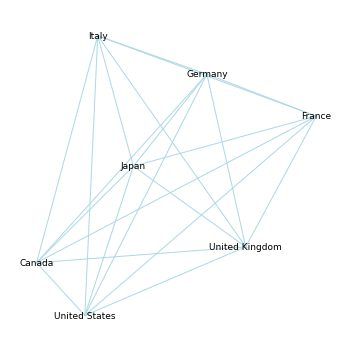

In [7]:
plt.subplots(figsize=(5,5))
pos=nx.random_layout(G)
nx.draw(G,pos=pos,font_size=9,**options)
nx.draw_networkx_labels(G,pos=pos,font_size=9)
plt.tight_layout()
plt.axis('off');
plt.show()

### Circular layout

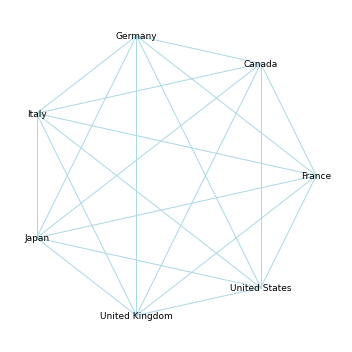

In [8]:
plt.subplots(figsize=(5,5))
pos=nx.circular_layout(G)
nx.draw(G,pos=pos,font_size=9,**options)
nx.draw_networkx_labels(G,pos=pos,font_size=9)
plt.tight_layout() #fits the subplot into the figure area
plt.axis('off') #remomve the x and y axis from the plot
plt.show()

In [9]:
#pickle helps to convert python object to byte stream to store it into a file
import pickle

f = open("graph.pickle", "wb")
pickle.dump(G, file = f)
f.close()